## Stock analysis and Segmentation
1. Load and Explore Data
- Use finance API to fetch stock data
- Select 5 - 10 stocks from S&P 500 or Nasdaq
- Inspect missing values and trends using Pandas and Seaborn

In [ ]:
# Import all necessary libraries for data analysis and visualization

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/Users/roshan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


In [4]:
# Get stock data for 5 - 10 companies from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']  # Example tickers
data = yf.download(tickers, start='2022-01-01', end='2025-01-01')

# check data
data.head()
# Output the first few rows of the data to ensure it's been fetched correctly

[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2022-01-03  178.879898  170.404495  144.301605  325.634735  399.926666   
2022-01-04  176.609634  167.522003  143.712418  320.051056  383.196655   
2022-01-05  171.911880  164.356995  137.119446  307.765015  362.706665   
2022-01-06  169.042084  163.253998  137.092072  305.333069  354.899994   
2022-01-07  169.209137  162.554001  136.365036  305.488739  342.320007   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2022-01-03  179.734947  170.703506  145.157013  328.796237  400.356659  ...   
2022-01-04  179.793920  171.399994  145.787989  326.072504  402.666656  ...   
2022-01-05  177.071596  167.126495  143.811952  317.191159  390.113342  ...   
2022-01-06  172.285336  164.800003  139.274144  310.021828  362.666656  ...   
2022-01-07  171.145259  165.243500  137.789728  307.881745  360.309998  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2022-01-03  174.771790  167.550003  144.364795  326.218403  382.583344   
2022-01-04  179.489254  170.438004  144.704167  325.712555  396.516663   
2022-01-05  176.521228  166.882996  143.732832  316.986856  382.216675   
2022-01-06  169.730043  163.450500  136.346642  304.622936  359.000000   
2022-01-07  169.916756  163.839005  137.488161  305.595729  360.123322   

Price          Volume                                           
Ticker           AAPL      AMZN     GOOGL      MSFT       TSLA  
Date                                                            
2022-01-03  104487900  63520000  28646000  28865100  103931400  
2022-01-04   99310400  70726000  28400000  32674300  100248300  
2022-01-05   94537600  64302000  54618000  40054300   80119800  
2022-01-06   96904000  51958000  37348000  39646100   90336600  
2022-01-07   86709100  46606000  29760000  32720000   84164700  

[5 rows x 25 columns]

## 2. Feature Engineering (Volatility, Returns, Moving Averages)
- Calculate daily returns, volatility, moving averages, RSI
- Normalize data using 

# Financial Concepts Explained Simply

**Daily Returns**
This is like checking how much your piggy bank grew or shrank today. If you had $10 yesterday, and today you have $11, your daily return is $1 or 10%. If tomorrow you have $9, your daily return would be -$2 or -18%.

**Volatility**
Imagine a toy car that sometimes drives smoothly and sometimes bounces up and down wildly. Volatility is how bouncy the ride is. Stocks with high volatility jump up and down a lot in price, like a super bouncy ball. Low volatility stocks move more like a turtle - slow and steady.

**Moving Averages**
Instead of just looking at today's temperature, a moving average is like taking the last 5 days' temperatures and finding the middle one. It helps smooth out the bumps so you can see the real direction things are heading. If it's been 70°, 72°, 68°, 71°, and 74°, the 5-day moving average would be 71°.

**RSI (Relative Strength Index)**
This is like a speedometer for stocks that goes from 0 to 100. When it reads over 70, the stock might be running too fast and needs to rest (it might go down soon). When it reads below 30, the stock is very tired from running down and might start climbing up again. It helps us know when something has gone too far in one direction.

### Why are we doing this?
- Stock prices alone don’t tell us how a stock is performing. Instead, we use daily returns, which measure how much a stock’s price has changed compared to the previous day.

### Formula for Daily Returns

Daily Return = (Today's Price - Yesterday's Price)/Yesterday's Price

In [7]:
# import standardScalar from sklearn to standardize the data
from sklearn.preprocessing import StandardScaler

# Compute daily returns
returns = data.pct_change().dropna()  # Calculate daily returns and drop the first row with NaN values

# Show first few rows of returns
returns.head()

Price          Close                                              High  \
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA      AAPL   
Date                                                                     
2022-01-04 -0.012692 -0.016916 -0.004083 -0.017147 -0.041833  0.000328   
2022-01-05 -0.026600 -0.018893 -0.045876 -0.038388 -0.053471 -0.015141   
2022-01-06 -0.016693 -0.006711 -0.000200 -0.007902 -0.021523 -0.027030   
2022-01-07  0.000988 -0.004288 -0.005303  0.000510 -0.035447 -0.006617   
2022-01-10  0.000116 -0.006570  0.012061  0.000732  0.030342 -0.009418   

Price                                               ...      Open            \
Ticker          AMZN     GOOGL      MSFT      TSLA  ...      AAPL      AMZN   
Date                                                ...                       
2022-01-04  0.004080  0.004347 -0.008284  0.005770  ...  0.026992  0.017237   
2022-01-05 -0.024933 -0.013554 -0.027237 -0.031175  ... -0.016536 -0.020858   
2022-01-06 -0.013921 -0.031554 -0.022603 -0.070356  ... -0.038472 -0.020568   
2022-01-07  0.002691 -0.010658 -0.006903 -0.006498  ...  0.001100  0.002377   
2022-01-10 -0.021677  0.002680 -0.005624 -0.020196  ... -0.022037 -0.019858   

Price                                       Volume                      \
Ticker         GOOGL      MSFT      TSLA      AAPL      AMZN     GOOGL   
Date                                                                     
2022-01-04  0.002351 -0.001551  0.036419 -0.049551  0.113445 -0.008588   
2022-01-05 -0.006713 -0.026790 -0.036064 -0.048059 -0.090829  0.923169   
2022-01-06 -0.051388 -0.039005 -0.060742  0.025031 -0.191969 -0.316196   
2022-01-07  0.008372  0.003193  0.003129 -0.105206 -0.103006 -0.203170   
2022-01-10 -0.022205 -0.014834 -0.074391  0.231308  0.883835  0.492204   

Price                           
Ticker          MSFT      TSLA  
Date                            
2022-01-04  0.131966 -0.035438  
2022-01-05  0.225866 -0.200786  
2022-01-06 -0.010191  0.127519  
2022-01-07 -0.174698 -0.068321  
2022-01-10  0.353591  0.090897  

[5 rows x 25 columns]

# 3. Compute Stock Volatility
### Why are we doing this?
Volatility measures how much a stock’s price fluctuates. High volatility means more risk, while low volatility suggests stable stocks.

### Formula for Volatility
Volatility is calculated as the standard deviation of daily returns over a period (e.g., 30 days).

To find volatility, we:

- Write down all these daily jumps (up or down)
- Find the average jump 
- For each day, see how far away that day's jump was from the average
- Square these differences 
- Find the average of these squared differences
- Take the square root of that number

That final number is volatility! A bigger number means your stock bounces up and down more wildly. A smaller number means it has a smoother ride.

In [10]:
# Calculate 30-day rolling sardard deviation (volatility) for each stock
volatility = returns.rolling(window=30, min_periods=1).std()

# Show first few rows of volatility
volatility.head()

Price          Close                                              High  \
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA      AAPL   
Date                                                                     
2022-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-05  0.009835  0.001398  0.029552  0.015019  0.008230  0.010939   
2022-01-06  0.007160  0.006538  0.025325  0.015631  0.016169  0.013718   
2022-01-07  0.011433  0.007275  0.021451  0.016737  0.013317  0.011785   
2022-01-10  0.011682  0.006705  0.021899  0.016258  0.032696  0.010277   

Price                                               ...      Open            \
Ticker          AMZN     GOOGL      MSFT      TSLA  ...      AAPL      AMZN   
Date                                                ...                       
2022-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2022-01-05  0.020515  0.012658  0.013402  0.026124  ...  0.030779  0.026937   
2022-01-06  0.014646  0.017950  0.009880  0.038068  ...  0.033320  0.021911   
2022-01-07  0.013928  0.014729  0.010196  0.033581  ...  0.027702  0.018636   
2022-01-10  0.013520  0.014525  0.010029  0.029181  ...  0.024948  0.017378   

Price                                       Volume                      \
Ticker         GOOGL      MSFT      TSLA      AAPL      AMZN     GOOGL   
Date                                                                     
2022-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2022-01-05  0.006409  0.017847  0.051253  0.001055  0.144444  0.658851   
2022-01-06  0.028769  0.019101  0.050503  0.042636  0.155582  0.645345   
2022-01-07  0.027082  0.020189  0.042844  0.053410  0.129147  0.564070   
2022-01-10  0.023907  0.017492  0.045810  0.131710  0.440161  0.519215   

Price                           
Ticker          MSFT      TSLA  
Date                            
2022-01-04       NaN       NaN  
2022-01-05  0.066397  0.116919  
2022-01-06  0.118848  0.164154  
2022-01-07  0.174715  0.134988  
2022-01-10  0.205325  0.131604  

[5 rows x 25 columns]

### 3. Compute Moving Averages
### Why are we doing this?
- Moving Averages (MA) smooth out stock price fluctuations to identify trends.

- 50-day MA → Short-term trend

- 200-day MA → Long-term trend

In [14]:
# Compute 50-day and 200-day moving averages for each stock
moving_avg_50 = data['Close'].rolling(window=50, min_periods=1).mean()
moving_avg_200 = data['Close'].rolling(window=200, min_periods=1).mean()

# Show first few rows of moving averages
moving_avg_50.head(), moving_avg_200.head()

(Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
 Date                                                                  
 2022-01-03  178.879898  170.404495  144.301605  325.634735  399.926666
 2022-01-04  177.744766  168.963249  144.007011  322.842896  391.561661
 2022-01-05  175.800471  167.427831  141.711156  317.816935  381.943329
 2022-01-06  174.110874  166.384373  140.556385  314.695969  375.182495
 2022-01-07  173.130527  165.618298  139.718115  312.854523  368.609998,
 Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
 Date                                                                  
 2022-01-03  178.879898  170.404495  144.301605  325.634735  399.926666
 2022-01-04  177.744766  168.963249  144.007011  322.842896  391.561661
 2022-01-05  175.800471  167.427831  141.711156  317.816935  381.943329
 2022-01-06  174.110874  166.384373  140.556385  314.695969  375.182495
 2022-01-07  173.130527  165.618298  139.718115  312.854523  36

### 5.Normalize Data for ML
Why are we doing this?
- ML algorithms work better when input data is scaled. We'll use StandardScaler to normalize our features (mean = 0, std = 1).

In [21]:
from sklearn.preprocessing import StandardScaler

# Create feature dataset
features = pd.DataFrame({
    'Returns': returns.mean(axis=1),  # Calculate row-wise mean
    'Volatility': volatility.mean(axis=1),  # Row-wise mean
    '50-Day MA': moving_avg_50.mean(axis=1),  # Row-wise mean
    '200-Day MA': moving_avg_200.mean(axis=1)  # Row-wise mean
}).dropna()  # Drop any NaN values

# Normalize data using StandardScaler
scaler = StandardScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame for easier handling
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Show the scaled features
features_scaled_df.head()

,Returns,Volatility,50-Day MA,200-Day MA
Date,,,,
2022-01-05,0.028257,-2.092542,1.136263,1.712726
2022-01-06,-0.967246,-1.548250,1.047358,1.592306
2022-01-07,-0.818957,-1.895211,0.976345,1.496119
2022-01-10,1.313160,-0.641729,0.941062,1.448329
2022-01-11,-1.175349,-0.056663,0.925601,1.427388


### 6. Visualizing Correlations
Why are we doing this?
- To understand relationships between features, we use a heatmap.

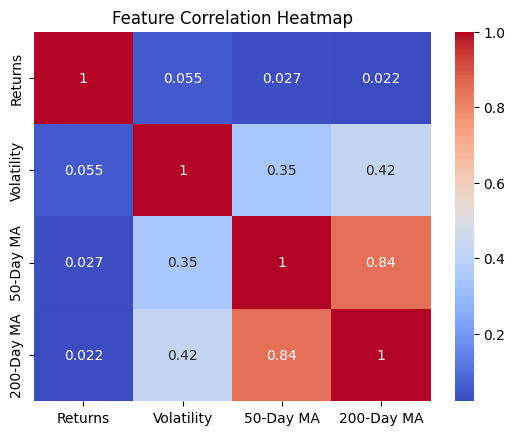

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
sns.heatmap(features.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
